In [5]:
# import libraries
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd


In [3]:
# here is some cleaning code to help you get started and work with your data in pandas

In [4]:
#parsing code for html from 
#http://srome.github.io/Parsing-HTML-Tables-in-Python-with-BeautifulSoup-and-pandas/

def Aparse_html_table(table):
    n_columns = 0
    n_rows=0
    column_names = []
    
    # Find number of rows and columns
    # we also find the column titles if we can
    for row in table.find_all('tr'):
                
        # Determine the number of rows in the table
        td_tags = row.find_all('td')
        if len(td_tags) > 0:
            n_rows+=1
            if n_columns == 0:
                # Set the number of columns for our table
                n_columns = len(td_tags)
                        
        # Handle column names if we find them
        th_tags = row.find_all('th') 
        if len(th_tags) > 0 and len(column_names) == 0:
            for th in th_tags:
                column_names.append(th.get_text())
    
    # Safeguard on Column Titles
    if len(column_names) > 0 and len(column_names) != n_columns:
        raise Exception("Column titles do not match the number of columns")
    
    columns = column_names if len(column_names) > 0 else range(0,n_columns)
    df = pd.DataFrame(columns = columns, index= range(0,n_rows))
    row_marker = 0
    for row in table.find_all('tr'):
        column_marker = 0
        columns = row.find_all('td')
        for column in columns:
            df.iat[row_marker,column_marker] = column.get_text()
            column_marker += 1
        if len(columns) > 0:
            row_marker += 1
                    
    # Convert to float if possible
    for col in df:
        try:
            df[col] = df[col].astype(float)
        except ValueError:
            pass
            
    return df  

In [5]:
page_circle = requests.get("http://www.nuforc.org/webreports/ndxsCircle.html")
page_triangle = requests.get("http://www.nuforc.org/webreports/ndxsTriangle.html")

In [6]:
circle_soup = BeautifulSoup(page_circle.content, 'html.parser')
triangle_soup = BeautifulSoup(page_triangle.content, 'html.parser')

In [7]:
#take the single table from the website

circle_content = circle_soup.find('table')
triangle_content = triangle_soup.find('table')

In [8]:
new_table_circle = Aparse_html_table(circle_content)
new_table_triangle = Aparse_html_table(triangle_content)

In [9]:
new_table_circle.head()

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,4/8/19 04:15,Palmdale,CA,Circle,3 seconds,"Driving N bound, 14 fwy, just about at the Aqu...",4/8/19
1,4/6/19 13:30,East Islip,NY,Circle,1 minute,"Circle metallic craft, extraordinary speed, th...",4/8/19
2,4/5/19 18:00,Montclair,NJ,Circle,,I was walking and I saw a saucer it was to fas...,4/8/19
3,4/4/19 08:10,West Cocalico,PA,Circle,20 minutes,There were two orbs that kept coming into view...,4/8/19
4,4/4/19 06:55,Columbia,SC,Circle,6 seconds,Large bright green ball with red tail crossed ...,4/8/19


In [10]:
new_table_triangle.head()  

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,4/6/19 23:15,Huson,MT,Triangle,5 minutes,Orange light flickering and floating in a the sky,4/8/19
1,4/4/19 06:51,Augusta,GA,Triangle,10 seconds,Bright green light triangle shaped falling fro...,4/8/19
2,4/4/19 06:50,Ponte Vedra Beach,FL,Triangle,5 seconds,Green fast moving light in the morning sky.,4/8/19
3,4/4/19 06:45,Efland,NC,Triangle,10 seconds,Bright green object flying low through the clo...,4/8/19
4,4/3/19 21:15,Red Deer (Canada),AB,Triangle,5+ seconds,I was on my back deck when I caught sight of a...,4/8/19


In [11]:
# now need to separate date and time into two separate columns
from datetime import datetime, timedelta

time_format = '%m/%d/%y %H:%M'
#month_format = '%m/%d/%y'

def is_date(date_string):
    try:
        datetime.strptime(date_string, time_format)
        return True
    except ValueError:
        return False 


In [12]:
# errors in date entry and values can be inspected and dealt with as you decide
# you can inspect and pre-process any variables you choose
# you can change this pre-processing code
# iloc obtains the value at the specified index

# you might also add an additional column to specify training/testing
# this could be done by adding a column name to the name_list and assigning a value in your code
        
        
def pre_process_and_remove_bad_rows(df):
    name_list = {'Date', 'City', 'State', 'Time', 'Shape', 'Duration', 'Summary', 'Posted', 'Month', 'Year'}
    clean_df = pd.DataFrame(columns = name_list)    
    
    for i in df.index:
        keep = 'TRUE'
            
        date_time = df.iloc[i, 0]
        if is_date(date_time):
            m = datetime.strptime(date_time, time_format)
            date = df.iloc[i,0]
            month = m.month
            year = m.year
            time = m.time()
            if (year != 2018):
                keep = 'FALSE'
            if (month > 8):
                keep = 'FALSE'
            
        else:
            keep = 'FALSE'
        
        city = df.iloc[i, 1]
        state = df.iloc[i, 2]
        shape = df.iloc[i, 3]
        duration = df.iloc[i, 4] 
        summary = df.iloc[i, 5]
        posted =str(df.iloc[i, 6])
        
        if keep == 'TRUE':
            df1 = pd.DataFrame({'Date':[date], 'Time':[time], 'City':[city], 'State': [state], 'Shape': [shape], 'Duration': [duration], 
                                'Summary':[summary], 'Posted':[posted], 'Month':[month], 'Year':[year]})
            
        
            #print(df1)
            clean_df = clean_df.append(df1, ignore_index = True)
            
    return clean_df

In [13]:
x = pre_process_and_remove_bad_rows(new_table_triangle)
y = pre_process_and_remove_bad_rows(new_table_circle)

/Users/josephyuenpro/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [14]:
x.head()

,City,Date,Duration,Month,Posted,Shape,State,Summary,Time,Year
0,Lumberton,8/31/18 21:38,2-3 minutes,8,9/13/18,Triangle,NC,"Triangle in shape, at least (6)+ white lights,...",21:38:00,2018
1,Barrie (Canada),8/27/18 21:30,3 hours,8,3/29/19,Triangle,ON,((NUFORC Note: Witness provides no detailed i...,21:30:00,2018
2,Warsaw,8/27/18 21:27,3 minutes,8,8/31/18,Triangle,MO,There was 3 lights in a triangle above lake fo...,21:27:00,2018
3,Salem,8/25/18 21:35,1 hour,8,8/31/18,Triangle,OR,The power just went out for about 1min. Then c...,21:35:00,2018
4,Los Banos,8/24/18 22:50,2 minutes,8,8/31/18,Triangle,,3 lights turned into flying triangle object. ...,22:50:00,2018


In [15]:
y.head()

,City,Date,Duration,Month,Posted,Shape,State,Summary,Time,Year
0,Tualatin,8/31/18 20:40,2-3 seconds,8,9/13/18,Circle,OR,"Fairly big, pure white, circular object with c...",20:40:00,2018
1,Clarkston,8/30/18 22:15,>5 minutes,8,9/13/18,Circle,MI,circle of light 200+ diameter. ((anonymous re...,22:15:00,2018
2,Commerce,8/30/18 21:36,5 seconds,8,8/31/18,Circle,GA,I was standing outside looking up at the stars...,21:36:00,2018
3,Amarillo,8/29/18 22:00,17 minutes,8,8/31/18,Circle,TX,Unexplained bright light.,22:00:00,2018
4,Sioux Falls,8/29/18 08:33,20 minutes,8,8/31/18,Circle,SD,Circle craft very high in the sky changing col...,08:33:00,2018


In [26]:
x = x.append(y, ignore_index = True)

In [17]:
x.to_csv('circles_and_triangles_cleaned.csv') #in case a csv is a more useful format for you

In [18]:
# generate time series figure with number of sightings per month (one line per shape)
# some useful example code 
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({"year": [1970,1980,1990,2000, 2010],
                   "cookies" : [4,8,16,32,64],
                   "apples" : [10,10,8,6,4] })

df.plot(x="year", y=["cookies", "apples"])
plt.show()




<Figure size 640x480 with 1 Axes>

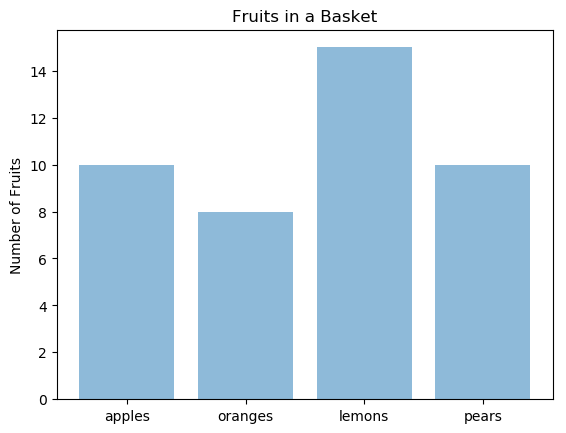

In [19]:
# generate bar chart for sightings by state
# https://pythonspot.com/matplotlib-bar-chart/

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
foods = ('apples', 'oranges', 'lemons', 'pears')
y_pos = np.arange(len(foods))
count = [10,8,15,10]
 
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, foods)
plt.ylabel('Number of Fruits')
plt.title('Fruits in a Basket')
 
plt.show()


In [20]:
# at least one other interesting data exploration that procides insight

In [21]:
# predict UFO shape
# build a decision tree classifier
# use features: 
#       50 states - use 4 census-defined areas
#       Time of day - use 4 parts of the day:
        # Night 00:00 - 05:59
        # Morning 06:00 - 11:59
        # Afternoon 12:00 - 17:59
        # Evening 18:00 - 23:59
# Report classification accuracy for decision tree
# implement decision tree built using training set  that uses gini impurity to determine best feature at each step
# Provide an illustration of the decision tree

# +5 points if improve accuracy - describe how, report results, what feature to distinguish ufo shape
        
        

In [22]:
# extra code to just read table content text
# not sufficient for the HW!

import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
url= "http://www.nuforc.org/webreports/ndxl.html"

def make_soup(url):
    thepage = urlopen(url)
    soupdata = BeautifulSoup(thepage, "html.parser")
    return soupdata

soup = make_soup ("http://www.nuforc.org/webreports/ndxl.html")

for record in soup.findAll('tr'):
    for data in record.findAll('td'):
        print (data.text)

4/5/19 05:21
Plymouth (UK/England)

Cigar
3 minutes
Cigar shape craft crashing.
4/8/19
3/31/19 21:45
Glastonbury (UK/England)

Light
4
Bright light it was NOT a aircraft and not sound.
4/8/19
3/30/19 20:30
Peshawar (Pushtakhara)(Pakistan)

Other
40 second
I saw this UFO in night 8:30pm.  it is shape was just like arrow.  Like this(^) it was too high from me.
4/8/19
3/29/19 06:30
Kuwait

Sphere
Not recorded
We went to the sea side early in the morning. Sun was already above the horizon and it was too bright. Me and my wife started clicking
4/8/19
3/25/19 04:00
Mays Landing

Chevron
30 seconds
3 v-formed lit objects spotted flying southward in linear formation behind one another.
3/29/19
3/20/19




((NUFORC Note:  Source of report provides no information.  PD))
3/21/19
3/17/19 23:00
Donnybrook

Unknown
2 hours
on tonight video more that a dozen of these orbes
3/21/19
3/17/19 17:15
Edirne (Turkey)

Disk
5 seconds
I am doing astrophotography as an amateur.I saw an object on the moon when 


Oval
~2 minutes
White light moving slowly in the morning sky
10/21/16
10/8/16 20:48
Cape Town (South Africa)

Formation
3 minutes
4 bright lights moving in formation in CPT
10/11/16
10/2/16
Mexico


5 seconds
i was watching a webcam from Mexico on the Colima volcano..you get a new frame every 30 sec or so and all of a sudden there was a UFO a
10/11/16
10/1/16 13:22
San Juan (Puerto Rico)

Disk
23 minutes
Saucer shape UFO was discovered in photos weeks later.
12/15/16
9/28/16 19:00
Chesterfield

Changing
1:00++
Two strange clouds swapping positions, with no visible illumination from the ground.  Chesterfield UK.  ((anonymous report))
10/11/16
9/28/16 05:45
Shrewsbury (UK/England)

Triangle
1 minute
Two large triangle shaped craft shooting lasers to the ground above town.
9/30/16
9/27/16 22:20
Lisbon (Portugal)

Light
5 minutes
4 lights in a triangular form and one in front, at different speeds with blinking lights.  ((anonymous report))
9/30/16
9/23/16 19:10
Ocoee

Unknown
1 minute
Two

5/22/15
5/21/15 11:00
Santa Barbara

Rectangle
a moment
I have pictures of 2 flying squares that my wife took on our way to San Francisco to watch my daughter graduating SFSU. I was discardin
8/13/15
5/18/15 02:15
Ambernath (India)

Disk
2 minutes
red and white lights blinking in a row of circle.
5/22/15
5/16/15 20:30
Brockman (Australia)

Sphere
10 minutes
Brighter orange sphere descends from the sky.
5/22/15
5/16/15 15:29
Alton (town) (UK/England)

Other
15-20 seconds
large silver balloon/parachute shaped object decending from sky.
5/22/15
5/16/15 06:32
Caracas (Venezuela)

Oval
None
Oval UFO floats in the sky of Caracas, Venezuela.
5/22/15
5/12/15 07:10
Kenosha/Racine (between)



Extremely bright rectangular objects in sky moving north.  Clear skies, well lit.
9/11/15
5/6/15 22:35
Tehran (Iran)

Unknown
it's happening
2 UFO, one is closer and it turns yellow red purple ,the one Which is far is red. I'm at home and I still can see them, I always look t
5/8/15
5/1/15 00:00
Warrington

~5-10 minutes
3 bright orange circular objects flying across sky.
4/11/14
4/4/14 22:30
Maribor (Slovenia)

Light
1 minute
((NUFORC Note:  April 4th, 2014, sighting.  PD))  2 red lights seen above Maribor, one moving upward, the other down in the city.
4/4/14
4/4/14 00:00
Heredia (Costa Rica)

Changing
30-60 minutes
Yellow lights in sky--1 big and 1 small.
4/11/14
4/4/14 00:00
Perth (Australia)

Changing
2+ hours
Red, green, flashing objects moving irriadically over ocean &quot;playing tag&quot; for several hours
4/11/14
4/3/14 22:30
Sunny Coast (Australia)

Unknown
5 seconds
Group of orange lights moving across the sky.
4/4/14
4/3/14 20:00
Tegucigalpa (Honduras)

Light
8 minutes
A bright object flew across the sky, stopped, lowered down and dashed back away at high speed.
4/11/14
4/3/14 19:15
Hyderabad (India)

Flash
60 seconds
Bright Orange Blob observed moving across Evening Eastern Sky of Hyderabad.
4/4/14
4/3/14 06:00
Bahamas

Changing
15 minutes
At 6:00 am I was staing on the balc

10 minutes
UFO spotted in the sky
5/15/13
5/4/13 09:00
Gladstone (Australia)

Light
4-5 minutes
Bright orange light slows down and flashes slowly and disappears.
5/15/13
5/2/13 22:00
Vega Baja (Puerto Rico)

Formation
30 minutes
Red orbs in formation over Puerto Rico.
5/15/13
5/2/13 22:00
Thane (India)

Other
5 minutes
Sighting of a weird aircraft.
5/15/13
5/2/13 02:20
Cairo (Egypt)

Triangle
10 seconds
Cairo.
7/3/13
5/1/13 21:00
Puerto Vallarta (Mexico)


2:15
Missing 2.15 hours with my Aunt while in Mexico ...both of us have no idea
3/20/15
4/29/13 17:35
Brisbane (Australia)

Formation
20 seconds
Vanishing 'V' formation of 9 small bird like objects
5/15/13
4/29/13 08:20
Nicosia (Cyprus)

Circle
10 minutes
I saw one object, round and white. When I first saw it it was closer to the earth but by the time I was ready to take pictures it had a
5/15/13
4/28/13 23:00
Albuera (Philippines)

Fireball
unkown
It looked like a metiorite but was rainbow collored.
5/15/13
4/27/13 23:15
Paphos (Cyp

6/13/12 21:50
Dehradun (India)

Flash
1 second
Bright white flash size of a moon, very fast moving south to west!
6/14/12
6/12/12 01:00
Kuiper Crater  (Mars)

Other
1 minute
Photo found at NASA site, search Planet Mercury, Spaceship leaving bright platform, heading north.
6/20/12
6/11/12 21:29
Yerevan (Armenia)


6-7 minues
At least 2 objs, possibly emitting in UV range, by camera in night sky over Yerevan.  ((NUFORC Note:  Lens flares, we believe.  PD))
6/14/12
6/11/12 01:00
Sarajevo (Bosnia/Herzegovina)

Unknown
10 minutes
White light, seen by one person, moving N to S through a modified straight zig-zag trajectory.  ((NUFORC Note:  Possibly the ISS?  PD))
6/14/12
6/10/12 21:00
West Bank (Israel)

Circle
~2 seconds
Circular brownish grey object floated across sky and over the horizon, 3 witnesses (2012)
10/23/13
6/9/12 23:23
Amsterdam (Netherlands)

Formation
5 minutes
Yellowish/Orange sphere seen by person on balcony. Amsterdam, The Netherlands
6/14/12
6/9/12 22:30
Birmingham (UK/En

Two triangular formation groups (for a total of  eight red lighted objects) were observed southwest of where I live moving west.
5/29/11
5/13/11 22:05
Ballymoney (Northern Ireland)

Oval
15min
Orange fiery disk flying
5/29/11
5/11/11 08:00
Roma (Australia)

Changing
30 seconds
On Thurs., 5th May, 2011, my wife and I were travelling back home to Central Queensland after I had a small operation at Ipswich Hospit
2/11/16
5/5/11 23:50
Dom Feliciano (Brazil)

Light
1 minute
On 05/05/2011 at exactly 23 hours and 53 minutes in the town of Bishop Feliciano in Brazil, I had gone into the kitchen of my house and
5/12/11
5/3/11 23:00
Armagh (Ireland)

Sphere
5 Seconds
2 balls of light moving at extremely high speed very close over head, silently.
5/12/11
4/28/11 17:57
Liverpool (Kirkdale) (UK/England)

Disk
5 sec
VERY VISIBLE!
5/2/11
4/28/11 15:30
Singapore/Borneo (between) (in flight)

Triangle
1-2 minutes
Black triangular object seen overtaking airplane during flight in Southeast Asia
3/13/12
4

4/13/10
4/7/10 09:15
Adelaide  (South Australia)

Fireball
5 minutes
red orange flying blob
7/6/10
4/5/10 19:00
Cancun (Mexico)

Triangle
7 hours
The object was glowing green and red. At times it went to just green and then white. Was usually green for the most part with red
4/13/10
3/31/10 01:40
Jafir (Jordan)


1:40
3 Saucers land in Jordan with tall Aliens heading down from them
4/13/10
3/31/10 01:00
Singapore

Light
Around 20 minutes
2 round lights fade in and out at certain interval while moving away slowly.
4/13/10
3/30/10 22:10
Germany

Circle
10-15 min
It was semi-cloudy night I was in my living room looked out the window. I sean a light come across the sky and stopped, thats what
5/12/10
3/27/10 21:45
London (UK/England)

Fireball
5-7mins
Three fiery-orange globes at regular intervals moving low across the sky against the wind,
4/13/10
3/26/10 06:45
Kaitaia (New Zealand)

Light
1 minute
Light Seen in Sky in Remote Part of New Zealand.
4/13/10
3/25/10 22:00
Sale (Manchester) (U

8/5/09
6/21/09 21:15
Tunbridge Wells (UK/England)

Light
20 mins
it was red light as got nearer orange ball
8/5/09
6/21/09 12:05
Middlesbrough (UK/England)

Unknown
10 minutes
star like objects
8/5/09
6/21/09 11:10
Wakefield/Barnsley (UK/England)

Fireball
15 mins
Orange pulsing fireball
8/5/09
6/20/09 23:40
Hereford (UK/England)

Fireball
3 minutes
travelling orange glow which moved fast and slowly got smaller until it disappeared.
8/5/09
6/20/09 22:00
Chiddingfold (UK/England)

Light
20-30mins
20-30 bright lights in chiddingfold, surrey, uk.
8/5/09
6/18/09 23:30
Letchworth (UK/England)

Light
10-15 mins
Darting white lights dancing through the clouds them vanished
8/5/09
6/18/09 23:05
Glasgow (UK/Scotland)

Disk
00:00:15
As my mother and i were looking through the window outside our back garden from inside the house at approx 23:05 we noticed a circular
8/5/09
6/18/09 06:45
Maguiresbridge (Ireland)

Fireball
2 mins
LARGE GLOWING ORANGE ORB
12/12/09
6/17/09 23:00
Newcastle-under-Lyme 

10/23/08 18:45
Malvern (Jamaica)

Circle
aprox 30 seconds
A large round green glowing ball, with a further yellow/orange interior ball falling straight down from the sky, but not landing.
10/31/08
10/22/08 19:25
Kirkby in Ashfield (UK/England)

Fireball
5 mins
orange ball seen over kirkby in ashfield nottinghamshire england
10/31/08
10/20/08 02:00
Indian Ocean

Unknown
5 minuts
at night in the middle of the ocean ( a light from unknown source inspecting my ship) from 50-100 meter
8/27/09
10/19/08 06:40
Puntarenas (Costa Rica)

Sphere
1 minute
Small white ball  2" diameter hovering in the ocean with 4" diameter blades.
10/31/08
10/18/08 23:45
Leuven (Belgium)

Circle
about 4 seconds
very fast yellow dot.
10/31/08
10/17/08 22:00
Bracknell (UK/England)

Circle
5 seconds
blue/white light moving away quickly
1/10/09
10/17/08 21:30
Dundalk (Ireland)

Other
20 - 25 seconds
Glowing object in sky, Ireland.
10/31/08
10/16/08 20:30
Las Piedras (Puerto Rico)

Light
7seconds
Bright Round Light, in 

12/29/07 23:10
West Sussex (UK/England)

Fireball
30 seconds
a small orange glowing ball travelling very high and fast and totally silent. Horsham West Sussex, England
3/4/08
12/29/07 21:00
Kirkby In Ashfield (UK/England)

Light
2
Changing Colour rapidly, Bright, Video Footage
1/21/08
12/28/07 11:23
Nassau (Bahamas)

Formation
don't know
Six objects over Nassau, Bahamas
1/21/08
12/27/07 21:25
Hull (UK/England)

Light
5 mintues
Three orange/amber lights observed in Hull England on the 27th December 2007 at 21:25
3/4/08
12/27/07




Dark gray smoky shaped saucer
1/21/08
12/26/07 20:00
Maceio (Brasil)

Oval
3 seconds
Flame red oval object moving fast on Maceio 26 Dec 2007 20:00 PM about
1/21/08
12/26/07 13:25
Ransbach-Baumbach (Germany)

Oval
12 seconds
Oval accerlating to incredible speed. 500 Lights On Object0: Yes
3/4/08
12/25/07 16:10
Cape Town (South Africa)

Disk
Photo
Strange object in the sky.
3/4/08
12/25/07 00:00
Wangaratta (Australia)

Light
1 minute
Three in formation
3/4/08
1

Bogota (Colombia)

Egg
10 seconds
egg object seen falling rapidly
3/8/07
3/3/07 16:30
London (UK/England)

Circle
25
Circle travelling straight for 20 secs then disapears
3/8/07
3/1/07 20:50
Waterford (Republic of Ireland)

Light
5mins
I witnessed a bright light in the sky over waterford city on the 01/03/07 fitting the exact description of an earlier sighting posted b
3/8/07
3/1/07 12:00
Cardiff (UK/Wales)

Teardrop
moments
Disk shaped craft captured on camera by accident over City Hall in Cardiff, Wales
4/14/09
2/28/07 19:30
Montego Bay (Jamaica)

Unknown
2 MIN
At 19:30 28/2/2007 while at a local pub sighted about 18 small lights moving at a slow speed towards the west.
3/8/07
2/26/07 18:30
Falkirk (UK/Scotland)

Light
15 minutes
MY TWO SONS AND THREE FRIENDS SAW A LARGE RED/ORANGE LIGHT IN SKY THAT CIRCLED OVER THEM. THEY TOOK SOME PHOTOS OF IT, AND THEY ARE TO
3/8/07
2/24/07 19:15
Georgetown (Guyana)

Unknown
1min
A UFO which came to a sudden stop over the city without turning, wen

Australia

Disk
2hrs
Green UFO throughout my sunrise photo's
7/16/06
6/10/06 02:30
Ipswich (UK/England)

Triangle
300 mins
3 ufos changing couler then shooting of around 2000 mile an hour
2/1/07
6/10/06 00:25
Birmingham (UK/England)

Triangle
10 seconds
black triangle than accelerated very quickly
7/16/06
6/9/06 23:00
Brighton (UK/England)

Light
10 mins
5 'shooting stars' across the English Channel (between Brighton, UK and Dieppe, France)
10/30/06
6/9/06 15:15
Lands End (Cornwall) (UK/England)

Circle
unknown
suprise ufo
10/30/06
6/8/06 22:30
London (UK/England)

Formation
20 seconds
approx 10 lumious uaps flying east west at high speed in cheveron shape
7/16/06
6/8/06 15:00
Shropshire (UK/England)

Disk
2mins
((HOAX??))  round
4/27/07
6/7/06 19:00
Adelaide (South Australia)

Other
1 minute
Changing coloured and shaped blobls in the night
8/7/07
6/7/06 14:36
Monterrey (Mexico)

Sphere
15 sec
go to fast speed
7/16/06
6/6/06 22:00
Brighton (UK/England)

Sphere
35mins
sperical shapes in


Disk
I don't know
picture taken in Romania,Dragesti from apox. 2-3 miles away
10/11/05
8/27/05 23:00
Amman (Jordan)

Triangle
3 mins
15 circular yellow lights ,in the form of triangle head moved from east to north west for 2-3 minutes befor disapearing in the horizon.
9/2/05
8/27/05 20:15
Hobart (Tasmania, Australia)

Formation
15 mins.
Moving orange stars in random formation moving north to south white aura when moving through cloud
9/2/05
8/27/05 10:00
Apodaca, Nuevo Leon (Mexico)

Light
35 MIN
A half hour ago, I and others have seen a very bright "star" moving from northest to southwest altmost on the cenit (70 to 90°)with a v
9/2/05
8/26/05 01:00
Euleuthera (Caribbean Sea)

Light
15 seconds
August  Carribbean cruise includes a UFO sighting off starboard
10/11/05
8/25/05 23:57
Wernhout (Netherlands)

Circle
3 minits
25/8/5 23:57 round yellow object moved fast near to ground followed by 2# object near Belgium border
9/2/05
8/24/05 22:45
Broadway (UK/England)

Unknown
2sec
bright red


Diamond

shining diamond object above my friends heads(smaller than football ball). I had make three picture with 5.2 MP camra, object is moving
12/3/04
11/11/04 19:40
UK/England

Circle
10 secs
the 2 brightest objects I have ever seen
12/3/04
11/11/04 18:25
London (UK/England)

Light
is still continuing
18:25 on 11/11/04 several light formations seen circling sky underneath clouds.
12/3/04
11/11/04 02:00
Brisbane (QLD, Australia)

Circle
10sec
It was a huge black round thing and it was leaving a green trail of smoke behind it.  It made a buzzing sound.
12/3/04
11/10/04 20:11
Puerto Vallarto (Mexico)

Light
ongoing
Odd lights remain over the Bay of Banderes, Puerto Vallarta, Mexico.… ((NUFORC Note:  Possibly stars, we suspect.  PD))
12/3/04
11/9/04 22:00
Wormley, Hertfordshire  (UK/England)

Circle
2-3 minutes
11/9/04 22:00 circular shape glowing orange travelling slowly diagonally downwards across the sky visible for 2-3 minutes
12/3/04
11/9/04 10:02
Ueno City (Japan)

Fireball
1 hou

Diamond
10 minutes
IT WAS JET BLACK (THE SIZE OF A SMALL ROOM) DIAMOND SHAPED AND HOVERING ABOUT 50 FEET ABOVE THE GROUND.
3/23/04
3/7/04 21:00
Luton (UK/England)

Changing
20mins
i seen two objects in the sky
3/9/04
3/7/04 19:00
London (UK/England)

Other
90 mins
Brillently lite Trident shaped object hung in the sky
3/9/04
3/7/04 01:10
Nottingham (UK/England)

Circle
20 minates
Circular shape with diamond shaped lights,hoverinrg and humming
7/25/04
3/6/04 23:00
Hertfordshire (UK/England)

Triangle
2 hours
Faster than Mach 5, made barely any noise, far better technology than ours
2/8/05
3/6/04 19:55
Fleetwood (UK/England)

Sphere
5 Minutes
White object moving slowly over cleveleys/thornton area
3/17/04
3/6/04 18:00
Spalding (UK/England)

Light
10 seconds
Bright light appeared in the sky and then abruptly disappeared!
3/17/04
3/5/04 23:00
Mexico City (Mexico)

Disk
5 min.
UFO's over Mexico City
6/4/04
3/5/04 22:30
Gold Coast (Australia)

Light
3 Seconds
It was a very stormy night with a

Light
2mins
ligt in the sky over glasgow
7/16/03
6/25/03 00:15
Barcelona (Spain)

Light
second
One green light that made a fast loop in the dark sky, and disappeared, high above the mountains
7/16/03
6/23/03 23:10
Kuala Lumpur (Malaysia)

Oval
3.50 min
So gra...eat
7/16/03
6/23/03 16:20
Prishtina (Kosovo)

Changing
10 min
Its look like metal object, shining, fluctuacting trajectory, very slowly.
7/16/03
6/22/03 21:15
Oosterhout (Netherlands)

Cigar
5sec
cigar shaped ufo, with a high speed direction change
7/16/03
6/19/03 19:45
Tasmania (Australia)

Other
15 mins
A star liked thing that was flashing really prominient colours and hovers for awhile then just goes black.
7/16/03
6/18/03
Rome (Italy)


????
Crop Circle in Rome(E.U.R.district)and Sabaudia(near Rome)
9/17/03
6/16/03 17:00
Armidale (Australi)

Disk
20 minutes
A Disk/cigar shaped object ,100m in lenght , bright orange to silver in colour, splits into 2 craft then reforms as one.
8/11/04
6/15/03 23:59
Folkestone (Germany)

Unkno

<10 secs
Rolling white diamond above hills
12/23/02
10/1/02 13:35
Karavostasi (Greece)

Cross
1 minute
a look-through aircraft a la 'predator'
12/14/04
10/1/02 00:30
Hong Kong

Formation
30 minutes
Sighting in Hong Kong SAR
10/15/02
9/30/02 03:30
Curitiba - S of Brazil (Brazil)

Unknown
30'
Visitors?
10/15/02
9/30/02 00:00
Utrecht (Netherlands)

Light
30 min.
UFO sighting over Belgian - Netherlands border.(Europe)
10/15/02
9/29/02 23:00
Brabant (Netherlands)

Light
0:45
If was a flashlight wich was following a car for 45 minuts. As the car stoped the object hang still above the car, as the car drive awa
10/15/02
9/29/02 21:40
Colchester (UK/England)

Light
6 minutes
triangular light pattern seen in sky.
10/15/02
9/29/02 07:30
London (UK/England)

Other
3-5 minutes
4 angular brown objects moving in straight path, each with smaller  areas that constantly changed
10/15/02
9/27/02 15:30
Grindelwald (Switzerland)

Sphere
5 mins.
Observed one aluminum colored spherical object in Switzerland 

3 minutes
Teardrop
1/11/02
12/25/01 22:10
Hartlepool (UK/England)

Unknown
10 mins
First the ufo was there, then it dissappered.
6/12/02
12/25/01 20:00
Adelaide (South Australia)

Light
3 min
3 orange dots in triangle formation ,followed by another three 30 seconds later .seen by seven adults
5/14/02
12/24/01 21:00
Punteranus (Costa Rica)

Flash
approx 2-3 seconds
two objects - one at a time shooting through the sky and extinquishing in mid flight...the second exactly the same - a seconds apart
2/22/02
12/24/01 14:00
Kerry (Republic of Ireland)

Cigar
35-40 seconds
2 cigar shaped objects sighted
1/11/02
12/24/01 04:17
Berlin (Germany)

Light
1 minute
When I came back from the Bathroom on December, 24 at 4:17, I went to bed again and watched the sky, as i often did. Suddenly i saw 3 f
7/26/02
12/22/01 13:00
San Fernando (Chile)

Cigar
00:03
TENIA FORMA DE CIGARRO Y DE COLOR BLANCO, AVANZABA LENTAMENTE, SE DETUVO EN UN MOMENTO INCLINANDOSE DE IZQUIERDA A DERECHA 3 VECES PARA
2/22/02
12/1

This will make your hair stand up.
2/18/01
1/20/01 22:30
Cape Town (South Africa)

Triangle
+-40mins
bright arrow shape lights over Cape Town South Africa
2/18/01
1/20/01 22:00
Cascavel, Paraná (Brazil)

Light
50 minutes
A huge bright point in the sky.
2/18/01
1/20/01 19:40
Fleetwood (UK/England)

Circle
10 minutes
5 orange or amber lights changed formation moved away ot to sea slowly.
2/18/01
1/19/01 23:35
Aberdeen (UK/Scotland)

Light
5 to 10 mins
It was trully Amzing but frightening at the same time i would like nothing more than to find out what they were.
8/5/01
1/18/01 21:15
UK/England

Light
10 mins
Two bright moving lights, silent and pink in colour !
2/18/01
1/15/01 19:30
Sheffield (UK/England)

Other
5 minutes
i have top footage of this event , and i dont think anyone can question it
2/18/01
1/15/01 18:00
Glasgow (Near) (UK/Scotland)

Other
5 seconds
Falling bright light
7/1/02
1/13/01 18:01
Sheffield (UK/England)

Fireball
2 seconds
18:01 13/01/01 ORANGE FIREBALL PLUNGED DIR

two orange balls next to each other moving eraticly then dissapered over near roof tops
11/9/99
10/26/99 21:15
Newport (UK/England)

Oval
21:35
oval, lit up brigthly with flashing lights at the bottom.
11/2/99
10/23/99 05:30
Mumbai (India)

Other
unknown
It glowed with a redlight in the sky. It moved horizontally and vertically a little. It looked like a star but it wasn't one. I just wo
11/2/99
10/23/99 02:00
Johannesburg (South Africa)

Other
6 seconds
What can only be described as a comet with multiple light sources (at least three - one large at front and one to the left of the front
11/2/99
10/17/99 20:25
Melbourne (VIC, Australia)

Cylinder
25 min
The Craft zipped passed, zipped back, stopped,and just stood there for about twenty mins. The wittnesses said they had an eerie feeling
4/15/00
10/15/99 14:00
Yangtzee River (China)

Disk
30 MINUTES
LOOKED LIKE THE REAL THING
1/10/09
10/15/99 02:00
Inverness (UK/Scotland)

Formation
3 minutes
Four bright white lights moving in a row
12/

3/7/98
12/22/97 22:27
Costa Rica

Disk

12/26/97.. A mass sighting of UFOs over Costa Rica, C.A. was reported on CNNs web site this morning.. you might want to check it out.
3/7/98
12/10/97 19:00
Walsall, West Midlands (UK/England)

Unknown
5 seconds
I saw two circluar lights attached to a dark shape, which moved silently and quickly and disappeared.
4/26/99
12/10/97 10:00
Australia

Triangle
1 to 3 hrs
the object was just still in the sky above aus making a huming noise
8/24/04
12/6/97 01:45
Birkenhead (UK/England)

Other
6>9 secs
Hello. First may I say I had great dificulty in trying to register my details, I hope soon you will open a website that will encom
12/9/03
12/5/97 02:32
Guarenas, Miranda (Venezuela)

Fireball
seconds
I was just listening music from the sat reciever when I looked to the  window facing S.W. when I saw the fireball coming down diagonaly
8/10/99
11/26/97 22:30
Campbelltown (Australia)

Other
1 hour
UFO flew over neighbours house with object flying inside craft.

3/19/09
6/15/93 22:00
Riga (Latvia)

Unknown
10 min.
I never belived in UFO that day I did.
10/12/01
6/15/93 21:00
Mt. Isa (Australia)

Unknown
30 sec
Driving home i saw a light hovering in the sky witch then shot off with a flash of light.
12/2/00
6/15/93 14:00
Kent (UK/England)

Circle
30mins
Thought it was the sun but it was too low. Can find no explaination
3/4/03
6/15/93 04:00
Neyland (UK/Wales)


few minutes
the orange light passed directly over the house,humming and vibrating the window frame.it travelled north slowly
2/22/02
6/15/93 03:20
Peebles (near) (UK/Scotland)

Sphere
APPROX 15 MINUTES
Viewed at 200/300 yards using a rifle telescope it was very close and could not have been one of ours .
7/16/03
6/1/93 20:00
London (UK/England)

Other
30mins
may 93 ].8pm ufo over north london
3/6/01
6/1/93 20:00
Seville (Spain)

Unknown
total of 15m
Blue light and no sound
7/16/06
6/1/93 19:00
Banja Luka (Bosnia)

Triangle
10 seconds
1993 in Bosnia, triangle shaped craft with dim lights,

6/1/81 21:15
Balboa (Panama Canal Zone)

Sphere
3 minutes
three of us were standing outside our lodge after meeting and a sound like a very large dynamo slowing down was heard. The three of us 
9/17/00
6/1/81 20:00
Samora Correia (Portugal)

Disk
3:00
when i was 6 years old me and my cousin,of the same age,saw an object 10 meters up on the sky .wee where going from my aunt´s house
8/19/12
6/1/81 07:00
Fajardo (Puerto Rico)

Disk
5 to 10 minutes
A very large, silent craft floating above the ocean water in the early morning hours for 5 to 10 minutes.
3/8/07
5/25/81 21:45
Philippines

Light
10 minutes
I was looking on the sky two lights moving slowly its look like they seeking each other.
9/2/05
5/11/81 23:00
Warminster (UK/England)

Circle
2 minutes
Hi, My signting was a long time ago (1981). Although at the time I went to the Police station and reported the sighting and told everyo
10/30/12
5/7/81 09:00
Santiago (Chile)

Light
02 minutos
el unico objeto era un punto de luz blanco en una

6/30/68
Bong Son (Viet Nam)

Light
half hour
Navy fighter jets reported that objects had blown their doors off.
1/10/09
6/27/68 00:00
Sanchez (Dominican Republic)

Disk
1h
Description in Spanish of an apparent sighting in the Dominican Republic.
5/12/09
6/15/68 02:30
USS Kity Hawk Air Craft Carrier (off Viet Nam)

Light
10 minutes
The craft had hovering and speed capabilities way beyond anthing that I have ever seen.
3/4/03
6/15/68 01:00
Utapao RTAFB (Thailand)

Formation
20 minutes
Multiple lights in formation appearing on a horizontal line in the NNW sky
4/16/05
6/1/68 23:00
Azores (at sea)

Light
minutes
USS Scorpion sinking
3/19/02
6/1/68 05:00
Darmstadt (Germany)

Fireball
6 hours
UFO seen with contact and near abduction
5/24/05
6/1/68 00:00
Brisbane (Australia)

Triangle
5 minutes
The UFO was black, with red lights and strange markings on it.
12/12/09
6/1/68
Danang (Viet Nam)

Circle
2-4 min.
Clear Star lit sky.Don't remember date, but was not close to rain season. North east sky

In [3]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [6]:
col_names = ['City','Date','Time','Shape','State','Posted','Region','TimeOfDay']
dTDataTrain = pd.read_csv("trainingSet.csv", header=None, names=col_names)
dTDataTest = pd.read_csv("testSet.csv", header=None, names=col_names)

In [7]:
dTDataTrain.head()

,City,Date,Time,Shape,State,Posted,Region,TimeOfDay
0,Byron,6/27/18 0:00,0:00:00,Triangle,CA,7/5/18,4,1
1,Conway,6/25/18 18:30,18:30:00,Triangle,SC,7/19/18,3,4
2,Ammon,6/24/18 22:30,22:30:00,Triangle,ID,6/28/18,4,4
3,Princeton,6/22/18 1:30,1:30:00,Triangle,WV,6/28/18,3,1
4,Coon Rapids,6/21/18 16:00,16:00:00,Triangle,MN,7/5/18,2,3


In [8]:
dTDataTest.head()

,City,Date,Time,Shape,State,Posted,Region,TimeOfDay
0,Lumberton,8/31/18 21:38,21:38:00,Triangle,NC,9/13/18,3,4
1,Barrie (Canada),8/27/18 21:30,21:30:00,Triangle,ON,3/29/19,0,4
2,Warsaw,8/27/18 21:27,21:27:00,Triangle,MO,8/31/18,2,4
3,Salem,8/25/18 21:35,21:35:00,Triangle,OR,8/31/18,4,4
4,Los Banos,8/24/18 22:50,22:50:00,Triangle,NaN,8/31/18,0,4


In [9]:
#split dataset in features and target variable
feature_cols = ['Region', 'TimeOfDay']

# Train
X = dTDataTrain[feature_cols] # Features
y = dTDataTrain['Shape'] # Target variable

# Test
N = dTDataTest[feature_cols]
m = dTDataTest['Shape']

In [10]:
# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=1) # 100% training and 0% test

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
#clf = clf.fit(X_train,y_train)
clf = clf.fit(X,y)

#Predict the response for test dataset
#y_pred = clf.predict(X_test)
#y_pred = clf.predict(N)
y_score = clf.score(N,m)

In [12]:
print(y_score)

0.6133333333333333


In [13]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

['Circle' 'Triangle']


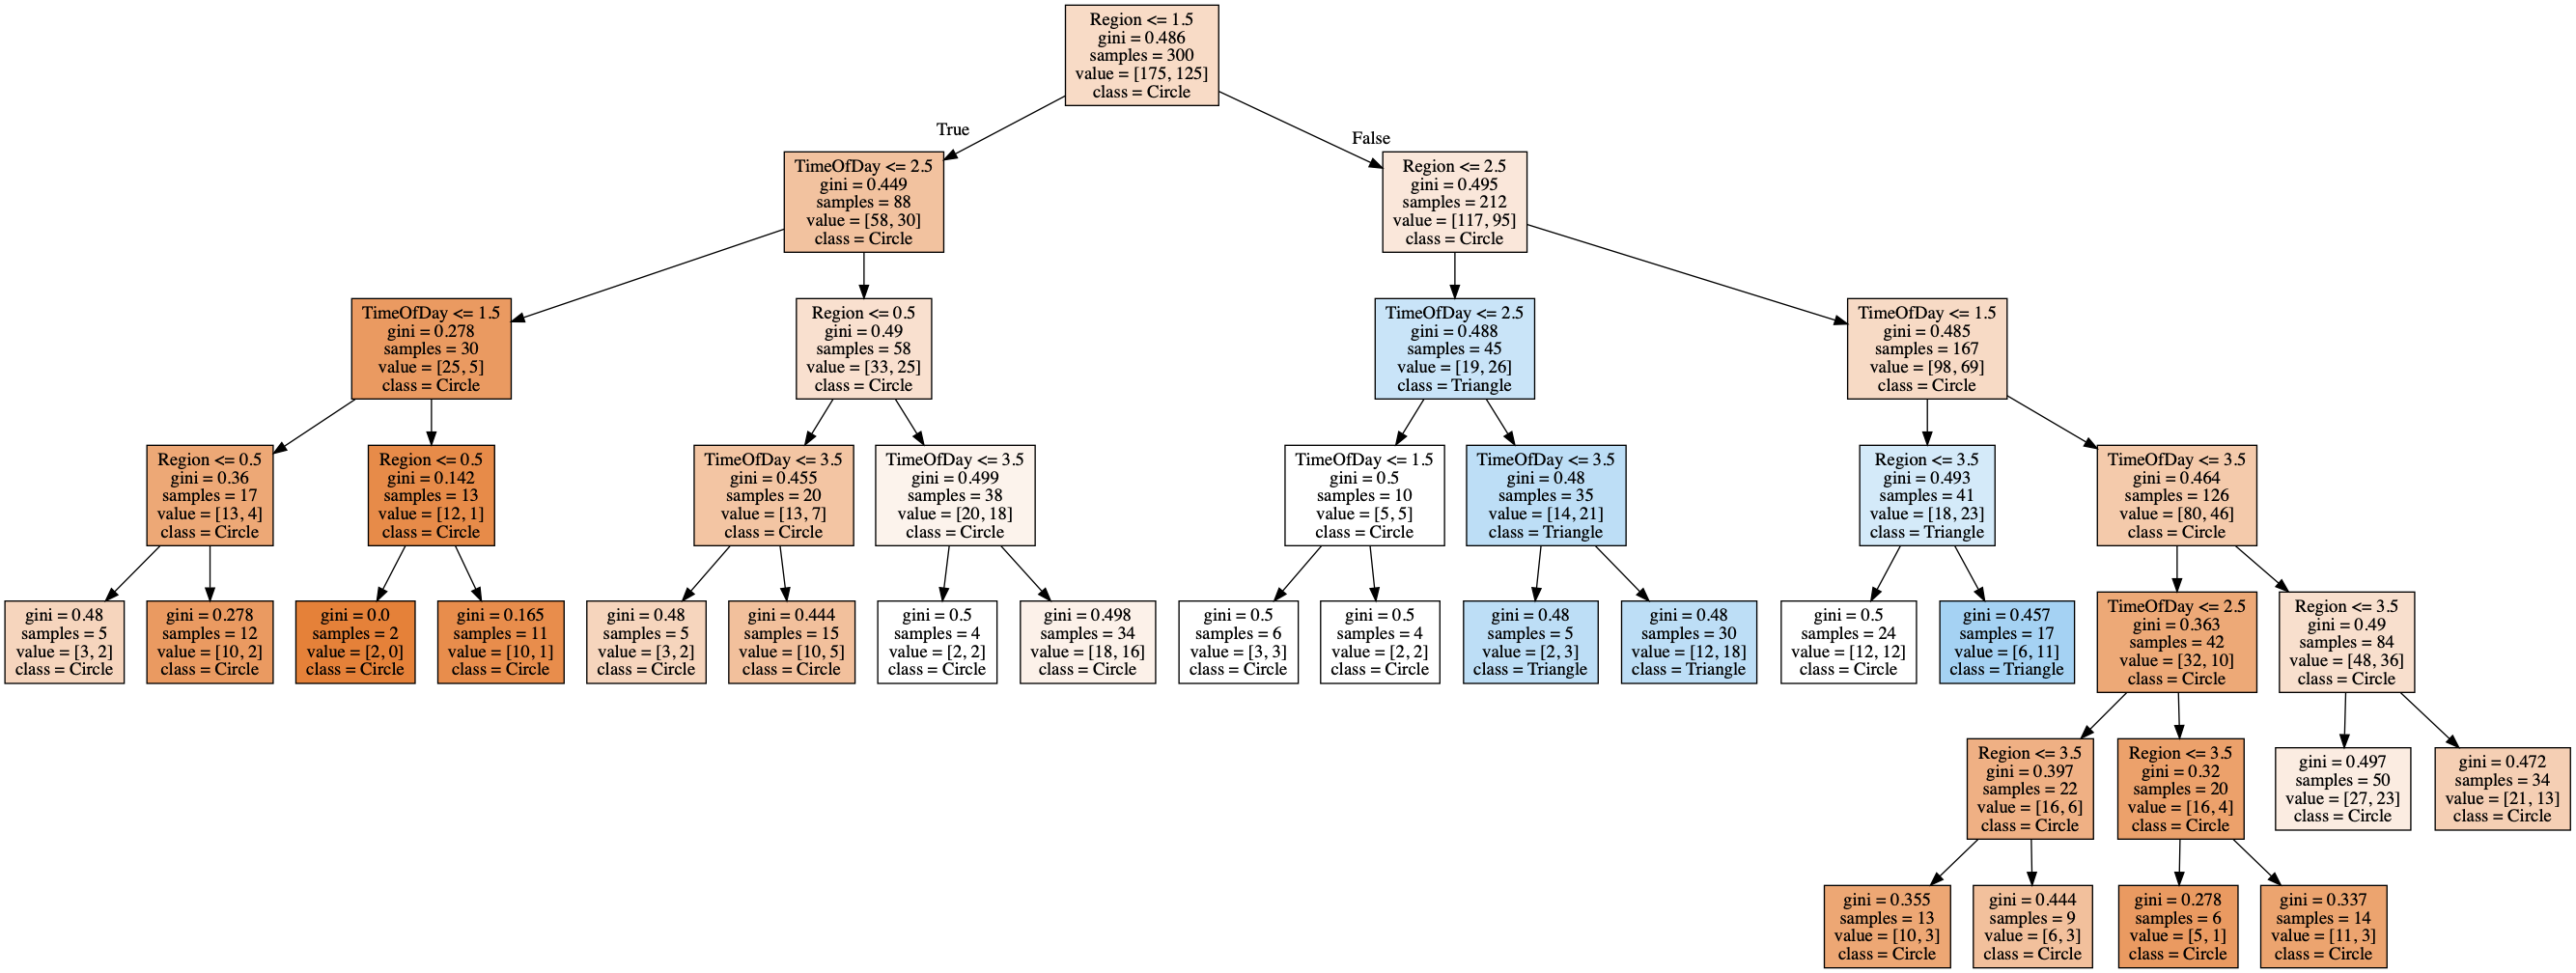

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
import pydotplus
print(clf.classes_)
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=False, feature_names = feature_cols,class_names=['Circle','Triangle'],impurity=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())